<a href="https://colab.research.google.com/github/aydanali/ECON3916-Stats-and-ML/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1

In [96]:
student_basket = [
    {'Item': 'Rent', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Groceries', 'Price_2016': 40, 'Price_2024': 60},
    {'Item': 'Spotify', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Sandwich', 'Price_2016': 7, 'Price_2024': 12},]

In [97]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Rent: 50.00% Inflation
Groceries: 50.00% Inflation
Spotify: 53.33% Inflation
Sandwich: 71.43% Inflation


# Phase 2

In [126]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='API_KEY')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
groceries = fred.get_series('CUSR0000SAF11') # Added Groceries
spotify = fred.get_series('CUSR0000SERA02')
sandwich = fred.get_series('CUSR0000SEFV')

df = pd.DataFrame({'Rent': rent, 'Groceries': groceries,
                   'Spotify': spotify, 'Sandwich': sandwich})

df_norm = df.dropna()

In [127]:
df

,Rent,Groceries,Spotify,Sandwich
1952-01-01,NaN,31.200,NaN,NaN
1952-02-01,NaN,30.700,NaN,NaN
1952-03-01,NaN,30.700,NaN,NaN
1952-04-01,NaN,30.800,NaN,NaN
1952-05-01,NaN,30.800,NaN,NaN
...,...,...,...,...
2025-08-01,437.462,314.472,592.604,384.909
2025-09-01,438.322,315.489,593.928,385.451
2025-10-01,NaN,NaN,NaN,NaN
2025-11-01,438.875,314.805,599.226,387.202


In [128]:
for i in df_norm:
  base = df_norm[i].iloc[0]
  df_norm[i] = (df_norm[i] / base) * 100

df_norm

/tmp/ipython-input-1554538994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[i] = (df_norm[i] / base) * 100


,Rent,Groceries,Spotify,Sandwich
1992-01-01,100.000000,100.000000,100.000000,100.000000
1992-02-01,100.206327,100.591716,100.553097,100.143062
1992-03-01,100.756534,101.035503,101.382743,100.214592
1992-04-01,100.550206,100.887574,102.986726,100.286123
1992-05-01,100.756534,100.517751,102.433628,100.429185
...,...,...,...,...
2025-07-01,299.966988,231.256657,328.807522,274.540773
2025-08-01,300.867950,232.597633,327.767699,275.328326
2025-09-01,301.459422,233.349852,328.500000,275.716023
2025-11-01,301.839752,232.843935,331.430310,276.968526


# Phase 3

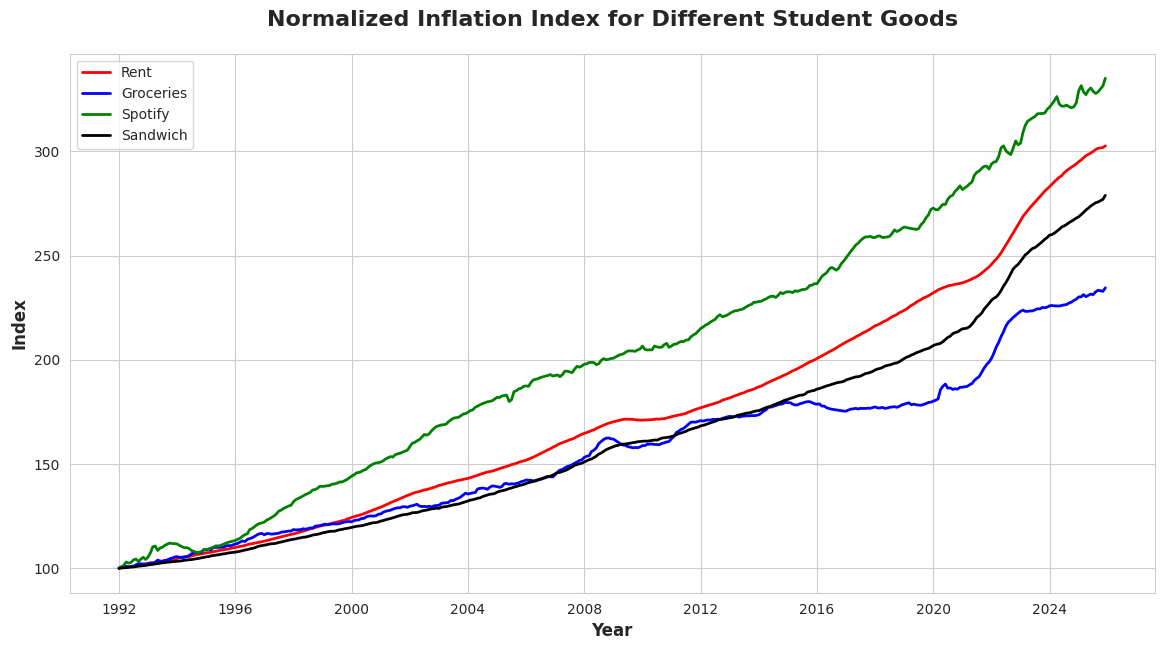

In [129]:
# Set the style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot series
ax.plot(df_norm.index, df_norm['Rent'],
        color='red',
        linewidth=2,
        label='Rent')

ax.plot(df_norm.index, df_norm['Groceries'],
        color='blue',
        linewidth=2,
        label='Groceries')

ax.plot(df_norm.index, df_norm['Spotify'],
        color='green',
        linewidth=2,
        label='Spotify')

ax.plot(df_norm.index, df_norm['Sandwich'],
        color='black',
        linewidth=2,
        label='Sandwich')

# Format and label
ax.set_title('Normalized Inflation Index for Different Student Goods',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index', fontsize=12, fontweight='bold')

plt.legend()
plt.show()

/tmp/ipython-input-4124758451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['Student_SPI'] = df_norm['Student_SPI'] = (df_norm['Student_SPI'] / base) * 100
/tmp/ipython-input-4124758451.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm['CPI'] = df_norm['CPI'] = (df_norm['CPI'] / base) * 100


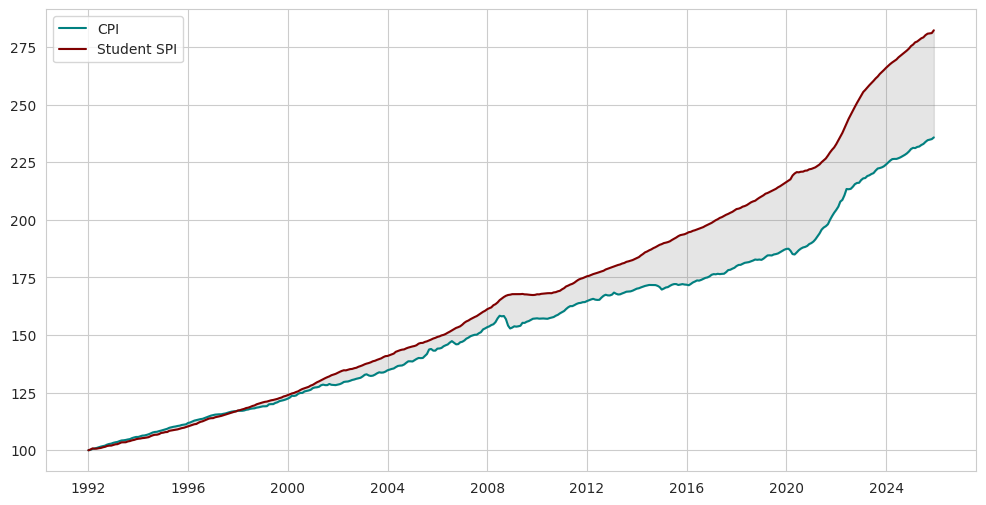

In [151]:
df_norm['Student_SPI'] = (df_norm['Rent'] * 0.6 + df_norm['Groceries'] * 0.3
                     + df_norm['Spotify'] * 0.02 + df_norm['Sandwich'] * 0.08) / 4
df_norm['CPI'] = official_cpi

df_norm = df_norm.dropna()

base = df_norm['Student_SPI'].iloc[0]
df_norm['Student_SPI'] = df_norm['Student_SPI'] = (df_norm['Student_SPI'] / base) * 100

base = df_norm['CPI'].iloc[0]
df_norm['CPI'] = df_norm['CPI'] = (df_norm['CPI'] / base) * 100


plt.figure(figsize=(12, 6))
plt.plot(df_norm.index, df_norm['CPI'], label='CPI', color='teal')
plt.plot(df_norm.index, df_norm['Student_SPI'], label='Student SPI', color='maroon')
plt.fill_between(df_norm.index, df_norm['CPI'], df_norm['Student_SPI'], color='gray', alpha=0.2)

# Format and label
ax.set_title('Plotting CPI vs Student SPI',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index', fontsize=12, fontweight='bold')

plt.legend()

plt.show()

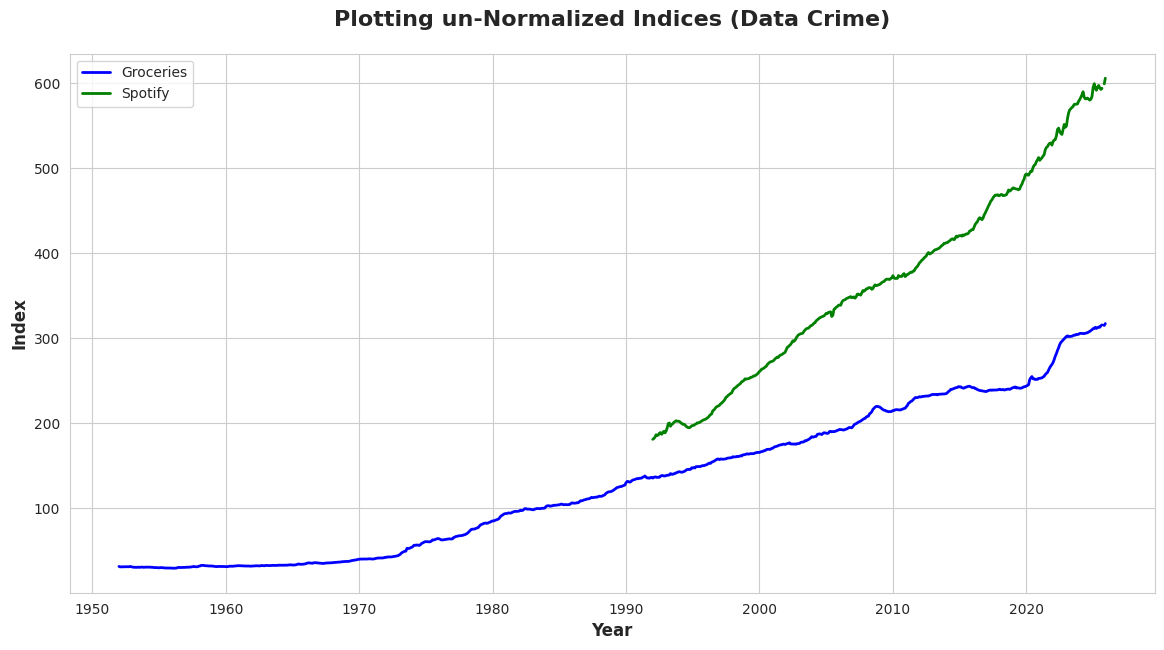

In [132]:
# Set the style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(df.index, df['Groceries'],
        color='blue',
        linewidth=2,
        label='Groceries')

ax.plot(df.index, df['Spotify'],
        color='green',
        linewidth=2,
        label='Spotify')

# Format and label
ax.set_title('Plotting un-Normalized Indices (Data Crime)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Index', fontsize=12, fontweight='bold')

plt.legend()

plt.show()

This plot shows a "Data Crime" because it compares data that in not comparable. Not normalizing the data and its starting points gives the numbers different reference points. Comparing raw indices with different base years is like apples and oranges. To make a valid comparison the indices must share base years and a starting point.





# Phase 4

In [158]:
df_phase4 = df_norm[['CPI', 'Student_SPI']]
df_phase4

,CPI,Student_SPI
1992-01-01,100.000000,100.000000
1992-02-01,100.216920,100.319776
1992-03-01,100.578453,100.809257
1992-04-01,100.795372,100.687237
1992-05-01,101.012292,100.705470
...,...,...
2025-07-01,232.922632,279.160743
2025-08-01,233.813449,280.128752
2025-09-01,234.539407,280.753534
2025-11-01,235.018800,281.014853


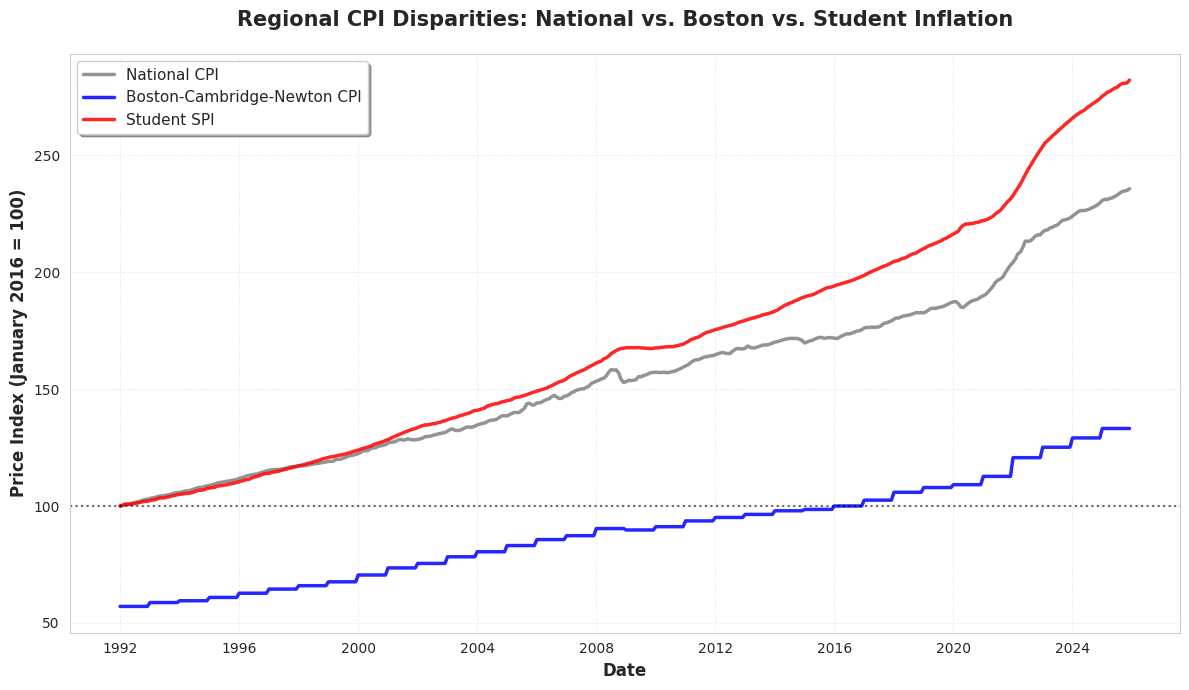


MACROECONOMIC ANALYSIS SUMMARY

Latest Values (as of December 2025):
  • National CPI:     235.74
  • Boston CPI:       133.16
  • Student SPI:      282.22

Regional Disparities:
  • Boston Premium over National:  -102.58 points (-43.51%)
  • Student Inflation Gap:         +46.48 points (+19.72%)

Cumulative Inflation Since Jan 2016:
  • National:  135.74%
  • Boston:    33.16%
  • Student:   182.22%


In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API (replace with your API key)
fred = Fred(api_key='API_KEY')

# Fetch Boston-Cambridge-Newton CPI-U
boston_cpi_raw = fred.get_series('CUUSA103SA0')

# Re-index Boston CPI so January 1, 2016 = 100
baseline_date = pd.Timestamp('2016-01-01')
baseline_value = boston_cpi_raw.loc[baseline_date]
boston_cpi_rebased = (boston_cpi_raw / baseline_value) * 100

# Convert to DataFrame with proper column name
boston_cpi_df = boston_cpi_rebased.to_frame(name='Boston_CPI')

# Merge Boston CPI with your existing df_phase4
# Using merge to align on datetime index
df_merged = df_phase4.merge(boston_cpi_df, left_index=True, right_index=True, how='left')

# Handle missing values (forward fill for bimonthly gaps)
df_merged['Boston_CPI'] = df_merged['Boston_CPI'].ffill()

# Create the visualization
plt.figure(figsize=(12, 7))

# Plot all three series
plt.plot(df_merged.index, df_merged['CPI'],
         color='grey', linewidth=2.5, label='National CPI', alpha=0.85)
plt.plot(df_merged.index, df_merged['Boston_CPI'],
         color='blue', linewidth=2.5, label='Boston-Cambridge-Newton CPI', alpha=0.85)
plt.plot(df_merged.index, df_merged['Student_SPI'],
         color='red', linewidth=2.5, label='Student SPI', alpha=0.85)

# Formatting
plt.title('Regional CPI Disparities: National vs. Boston vs. Student Inflation',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price Index (January 2016 = 100)', fontsize=12, fontweight='bold')
plt.legend(loc='upper left', fontsize=11, frameon=True, shadow=True, fancybox=True)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)

# Add baseline reference line
plt.axhline(y=100, color='black', linestyle=':', linewidth=1.5, alpha=0.6, label='Baseline (Jan 2016)')

plt.tight_layout()
plt.show()

# Macroeconomic Analysis Summary
print("\n" + "="*50)
print("MACROECONOMIC ANALYSIS SUMMARY")
print("="*50)
print(f"\nLatest Values (as of {df_merged.index[-1].strftime('%B %Y')}):")
print(f"  • National CPI:     {df_merged['CPI'].iloc[-1]:.2f}")
print(f"  • Boston CPI:       {df_merged['Boston_CPI'].iloc[-1]:.2f}")
print(f"  • Student SPI:      {df_merged['Student_SPI'].iloc[-1]:.2f}")

print(f"\nRegional Disparities:")
boston_premium = df_merged['Boston_CPI'].iloc[-1] - df_merged['CPI'].iloc[-1]
student_gap = df_merged['Student_SPI'].iloc[-1] - df_merged['CPI'].iloc[-1]

print(f"  • Boston Premium over National:  {boston_premium:+.2f} points ({(boston_premium/df_merged['CPI'].iloc[-1]*100):+.2f}%)")
print(f"  • Student Inflation Gap:         {student_gap:+.2f} points ({(student_gap/df_merged['CPI'].iloc[-1]*100):+.2f}%)")

print(f"\nCumulative Inflation Since Jan 2016:")
print(f"  • National:  {df_merged['CPI'].iloc[-1] - 100:.2f}%")
print(f"  • Boston:    {df_merged['Boston_CPI'].iloc[-1] - 100:.2f}%")
print(f"  • Student:   {df_merged['Student_SPI'].iloc[-1] - 100:.2f}%")
print("="*50)